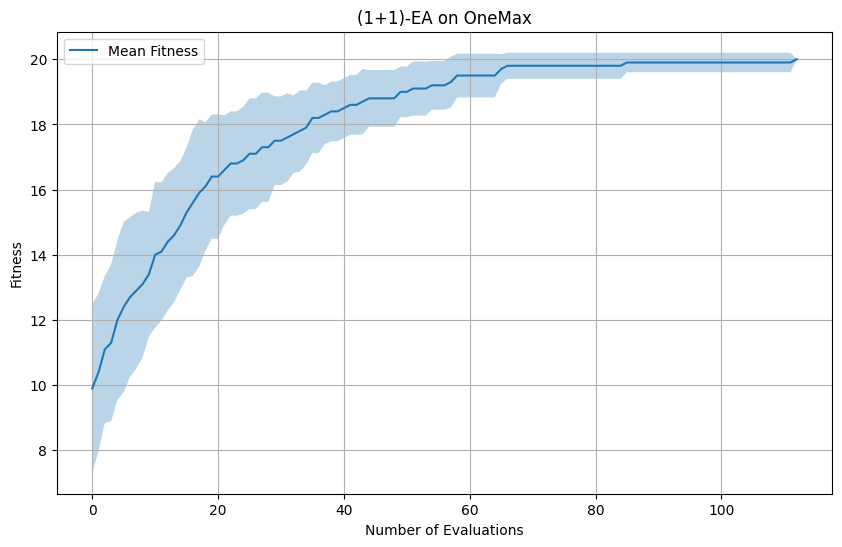

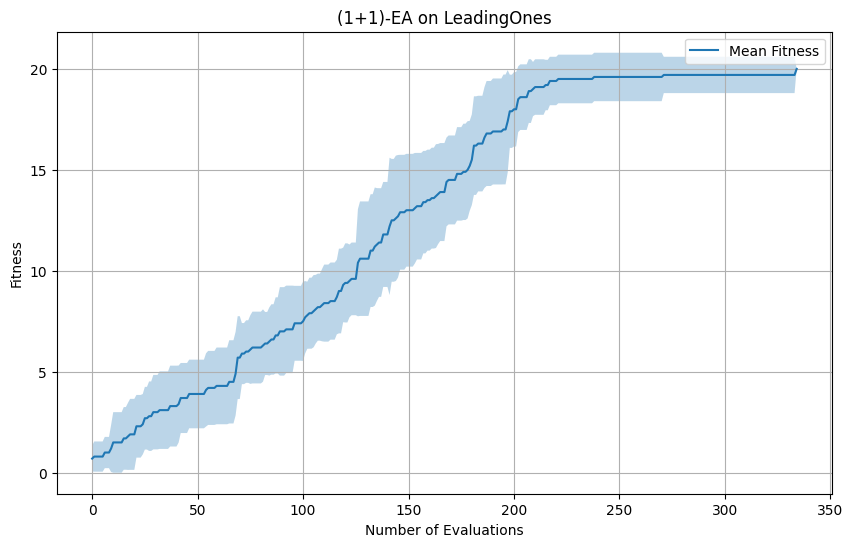

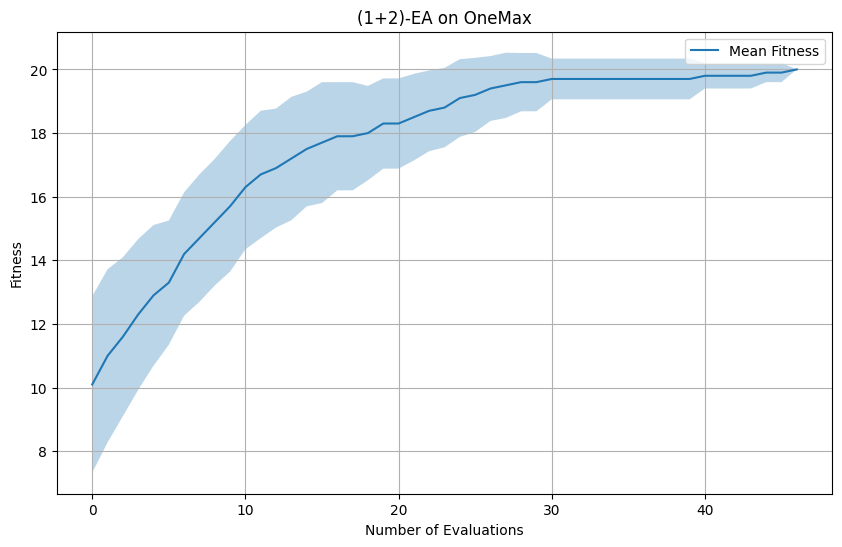

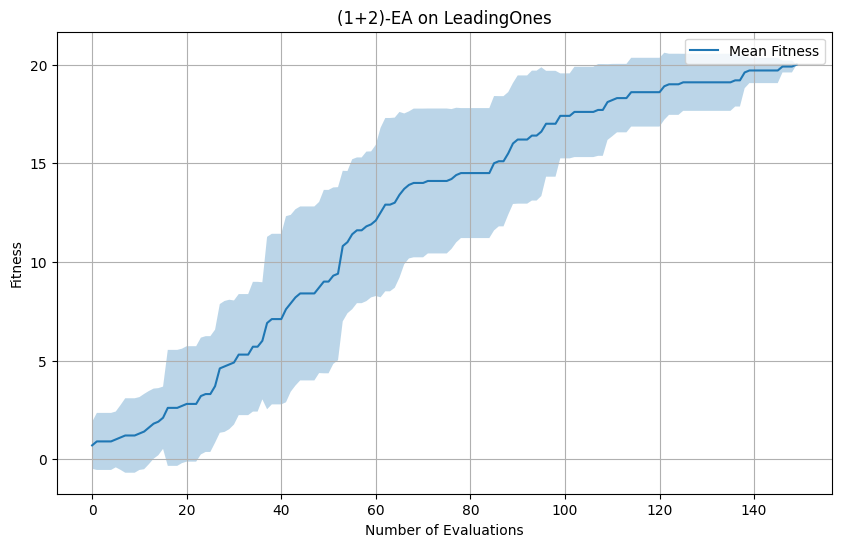

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Định nghĩa bài toán OneMax
def one_max(individual):
    return sum(individual)

# Định nghĩa bài toán LeadingOnes
def leading_ones(individual):
    return sum(1 for i, bit in enumerate(individual) if all(individual[:i+1]))

# Thuật toán (1+1)-EA
def one_plus_one_EA(problem, n, max_evals):
    best = np.random.randint(2, size=n)
    best_fitness = problem(best)
    evals = 1
    generations = 0
    fitness_over_time = [best_fitness]
    
    while best_fitness < n and evals < max_evals:
        offspring = best.copy()
        mutate_idx = np.random.randint(n)
        offspring[mutate_idx] = 1 - offspring[mutate_idx]  # Lật bit
        offspring_fitness = problem(offspring)
        evals += 1
        if offspring_fitness > best_fitness:
            best, best_fitness = offspring, offspring_fitness
        fitness_over_time.append(best_fitness)
        generations += 1

    return generations, evals, fitness_over_time

# Thuật toán (1+λ)-EA
def one_plus_lambda_EA(problem, n, max_evals, lam):
    best = np.random.randint(2, size=n)
    best_fitness = problem(best)
    evals = 1
    generations = 0
    fitness_over_time = [best_fitness]
    
    while best_fitness < n and evals < max_evals:
        offspring = [best.copy() for _ in range(lam)]
        for child in offspring:
            mutate_idx = np.random.randint(n)
            child[mutate_idx] = 1 - child[mutate_idx]  # Lật bit
        fitnesses = [problem(child) for child in offspring]
        evals += lam
        max_fitness = max(fitnesses)
        if max_fitness > best_fitness:
            best, best_fitness = offspring[np.argmax(fitnesses)], max_fitness
        fitness_over_time.append(best_fitness)
        generations += 1

    return generations, evals, fitness_over_time

# Hàm chạy thử nghiệm
def run_experiment(problem, n, max_evals, algorithm, lam=None):
    generations_list = []
    evals_list = []
    fitness_all_runs = []
    
    for _ in range(10):
        if lam:
            generations, evals, fitness_over_time = algorithm(problem, n, max_evals, lam)
        else:
            generations, evals, fitness_over_time = algorithm(problem, n, max_evals)
        generations_list.append(generations)
        evals_list.append(evals)
        fitness_all_runs.append(fitness_over_time)

    mean_generations = np.mean(generations_list)
    std_generations = np.std(generations_list)
    mean_evals = np.mean(evals_list)
    std_evals = np.std(evals_list)

    # Tính trung bình và độ lệch chuẩn cho mỗi thế hệ
    max_length = max(len(run) for run in fitness_all_runs)
    fitness_means = np.zeros(max_length)
    fitness_stds = np.zeros(max_length)

    for i in range(max_length):
        values_at_i = [run[i] if i < len(run) else run[-1] for run in fitness_all_runs]
        fitness_means[i] = np.mean(values_at_i)
        fitness_stds[i] = np.std(values_at_i)

    return mean_generations, std_generations, mean_evals, std_evals, fitness_means, fitness_stds

# Thiết lập tham số cho bài toán
n = 20
max_evals = 100000

# Chạy thử nghiệm cho (1+1)-EA
mean_gen_1p1_onemax, std_gen_1p1_onemax, mean_eval_1p1_onemax, std_eval_1p1_onemax, means_1p1_onemax, stds_1p1_onemax = run_experiment(one_max, n, max_evals, one_plus_one_EA)
mean_gen_1p1_leadingones, std_gen_1p1_leadingones, mean_eval_1p1_leadingones, std_eval_1p1_leadingones, means_1p1_leadingones, stds_1p1_leadingones = run_experiment(leading_ones, n, max_evals, one_plus_one_EA)

# Chạy thử nghiệm cho (1+λ)-EA với các giá trị λ khác nhau
lambda_values = [2, 4, 8, 16, 32, 64, 128]
results_onemax = []
results_leadingones = []

for lam in lambda_values:
    mean_gen_onemax, std_gen_onemax, mean_eval_onemax, std_eval_onemax, means_onemax, stds_onemax = run_experiment(one_max, n, max_evals, one_plus_lambda_EA, lam)
    mean_gen_leadingones, std_gen_leadingones, mean_eval_leadingones, std_eval_leadingones, means_leadingones, stds_leadingones = run_experiment(leading_ones, n, max_evals, one_plus_lambda_EA, lam)
    results_onemax.append((lam, mean_gen_onemax, std_gen_onemax, mean_eval_onemax, std_eval_onemax, means_onemax, stds_onemax))
    results_leadingones.append((lam, mean_gen_leadingones, std_gen_leadingones, mean_eval_leadingones, std_eval_leadingones, means_leadingones, stds_leadingones))

# Vẽ đồ thị hội tụ cho (1+1)-EA và (1+λ)-EA trên OneMax và LeadingOnes
def plot_convergence(means, stds, title):
    x = np.arange(len(means))
    plt.figure(figsize=(10, 6))
    plt.plot(x, means, label='Mean Fitness')
    plt.fill_between(x, means - stds, means + stds, alpha=0.3)
    plt.title(title)
    plt.xlabel('Number of Evaluations')
    plt.ylabel('Fitness')
    plt.legend()
    plt.grid()
    plt.show()

# Đồ thị hội tụ của (1+1)-EA trên OneMax
plot_convergence(means_1p1_onemax, stds_1p1_onemax, '(1+1)-EA on OneMax')

# Đồ thị hội tụ của (1+1)-EA trên LeadingOnes
plot_convergence(means_1p1_leadingones, stds_1p1_leadingones, '(1+1)-EA on LeadingOnes')

# Đồ thị hội tụ của (1+λ)-EA với λ = 2 trên OneMax
plot_convergence(results_onemax[0][5], results_onemax[0][6], '(1+2)-EA on OneMax')

# Đồ thị hội tụ của (1+λ)-EA với λ = 2 trên LeadingOnes
plot_convergence(results_leadingones[0][5], results_leadingones[0][6], '(1+2)-EA on LeadingOnes')


# Nhận xét về hiệu năng của (1+1)-EA và (1+λ)-EA trên bài toán OneMax:
### (1+1)-EA trên OneMax:

Thuật toán **(1+1)-EA** có xu hướng đạt được lời giải tối ưu dần dần thông qua việc lật một bit duy nhất tại mỗi thế hệ. Điều này dẫn đến quá trình hội tụ khá chậm khi chỉ có một đột biến tại mỗi bước.
Số lượng thế hệ và số lần gọi hàm đánh giá tăng lên khi kích thước của bài toán lớn. Tuy nhiên, vì n được giới hạn ở 20, thuật toán vẫn có thể đạt được lời giải tối ưu trong đa số các lần chạy.
(1+λ)-EA trên OneMax:

Với **(1+λ)-EA**, việc tạo ra nhiều cá thể con trong mỗi thế hệ (tương đương với λ) cho phép thuật toán có nhiều cơ hội để tìm ra lời giải tốt hơn tại mỗi bước. Điều này làm tăng khả năng đạt được lời giải tối ưu nhanh hơn so với **(1+1)-EA**.
Giá trị λ càng lớn thì khả năng hội tụ nhanh càng cao, nhưng cũng tăng số lần gọi hàm đánh giá mỗi thế hệ. Do đó, cần tìm λ tối ưu để cân bằng giữa tốc độ hội tụ và số lần gọi hàm đánh giá.
Nhận xét về hiệu năng của **(1+1)-EA** và **(1+λ)-EA** trên bài toán LeadingOnes:
**(1+1)-EA** trên LeadingOnes:

### Tương tự như bài toán OneMax, (1+1)-EA hội tụ chậm hơn do chỉ có một đột biến mỗi thế hệ.
Do đặc trưng của bài toán LeadingOnes yêu cầu các bit phải đúng thứ tự từ đầu đến cuối, thuật toán có thể mất nhiều thế hệ hơn để sửa đúng các bit phía trước nếu chúng bị sai, làm giảm tốc độ hội tụ.
**(1+λ)-EA** trên LeadingOnes:

Thuật toán **(1+λ)-EA** cải thiện hiệu năng rõ rệt trên LeadingOnes do khả năng tạo ra nhiều cá thể con, tăng khả năng sửa đúng các bit quan trọng ở đầu chuỗi.
Khi λ tăng, thuật toán có thể tìm ra lời giải tối ưu nhanh hơn do có nhiều cơ hội kiểm tra và sửa các bit sai, đặc biệt là các bit ở đầu chuỗi.
## Tổng kết:
**(1+1)-EA** phù hợp với các bài toán có kích thước nhỏ hoặc yêu cầu đơn giản về đột biến, nhưng hiệu năng sẽ bị giảm nếu cần sửa nhiều vị trí trong lời giải.
**(1+λ)-EA** thể hiện hiệu năng vượt trội hơn khi λ được chọn phù hợp, vì nó tận dụng được sức mạnh của nhiều cá thể con để nhanh chóng cải thiện lời giải.
Trên cả hai bài toán, giá trị λ tối ưu là cần thiết để đảm bảo hiệu năng tốt nhất mà không gây quá tải về số lần gọi hàm đánh giá.